In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def encods(sentences):
    # Tokenize sentences
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)
    return sentence_embeddings

/home/navarro/miniconda3/envs/tests311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def pca_visualizar(sentences, sentence_embeddings):
    # Aplicando PCA para reduzir a dimensionalidade para 2 componentes
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(sentence_embeddings)


    # Explicando a variância por componente
    print("Proporção de variância explicada por componente:", pca.explained_variance_ratio_)
    print("Componentes principais:\n", pca.components_)

    # Visualizando os dados transformados
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, edgecolor='k', c='green')


    # Adicionando labels às amostras no gráfico
    for i, label in enumerate(sentences):
        plt.text(X_pca[i, 0], X_pca[i, 1], label, fontsize=12, ha='right')



    plt.title("Dados Após PCA")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.show()


In [3]:
def tsne_visualizer(sentences, sentence_embeddings):
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(sentence_embeddings)

    # Visualizando os dados transformados
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.6, edgecolor='k', c='green')


    # Adicionando labels às amostras no gráfico
    for i, label in enumerate(sentences):
        plt.text(X_embedded[i, 0], X_embedded[i, 1], label, fontsize=12, ha='right')



    plt.title("Dados Após TSNE")
    plt.xlabel("1")
    plt.ylabel("2")
    plt.show()


In [4]:
sentences = ['airplane','car', 'apple']
sentences = ['pedro álvares cabral','cristóvão colombo', 'índios', 'brasil','batata','Índia','indígena','oca','indiano','mandioca','tupi','espanha','portugal','méxico','argentina','angola','japoneses','europeus','alemães','asiáticos','americanos']

In [5]:
sentence_embeddings = encods(sentences)

In [6]:
print("Sentence embeddings:")
print(sentence_embeddings[0])
print(sentence_embeddings[1])
print(sentence_embeddings[2])

Sentence embeddings:
tensor([-3.6659e-02,  2.3856e-02,  1.5596e-02,  2.0716e-02, -1.1255e-03,
        -3.1487e-02, -3.0616e-02,  3.0136e-02, -9.9145e-02,  1.6910e-02,
         5.7638e-02,  4.5916e-02,  4.3117e-02, -8.1196e-02,  2.1868e-02,
        -3.1271e-03, -3.3179e-02, -3.6920e-02,  1.2054e-02, -4.4666e-02,
        -3.9536e-02, -7.6993e-04,  3.9044e-02,  3.5272e-02,  4.3338e-02,
        -2.6918e-02,  3.1588e-04, -4.4529e-02, -1.6416e-02,  1.2520e-02,
         4.9007e-02,  1.6949e-02, -2.1851e-02, -2.2209e-02,  1.6717e-06,
        -2.6591e-03, -1.2420e-02, -5.0594e-03,  4.0794e-02, -8.8482e-02,
         1.3845e-03,  3.5703e-02,  4.7102e-02,  4.0240e-02, -1.7992e-02,
        -4.3825e-02,  2.6033e-02, -1.9542e-02, -3.1667e-02, -2.9996e-02,
         2.5522e-02, -7.4665e-02, -5.1230e-03,  9.6388e-04,  6.4653e-02,
        -5.8508e-02,  1.4168e-02, -2.0144e-02, -1.6229e-02,  4.7042e-03,
         2.6830e-02, -2.1390e-02,  4.7411e-02, -3.4147e-02,  5.2125e-02,
        -4.5754e-02, -3.0338e-

In [7]:
for i in range(0, len(sentences)):
    print(
        sentences[0],
        sentences[i],
        (sentence_embeddings[0] @ sentence_embeddings[i]).item()
    )    

pedro álvares cabral pedro álvares cabral 1.0
pedro álvares cabral cristóvão colombo 0.47836801409721375
pedro álvares cabral índios 0.25814422965049744
pedro álvares cabral brasil 0.3138163983821869
pedro álvares cabral batata 0.30481016635894775
pedro álvares cabral Índia 0.05745549499988556
pedro álvares cabral indígena 0.211583212018013
pedro álvares cabral oca 0.23573575913906097
pedro álvares cabral indiano 0.2834424376487732
pedro álvares cabral mandioca 0.38741064071655273
pedro álvares cabral tupi 0.17196190357208252
pedro álvares cabral espanha 0.45011234283447266
pedro álvares cabral portugal 0.2960736155509949
pedro álvares cabral méxico 0.26303690671920776
pedro álvares cabral argentina 0.27567169070243835
pedro álvares cabral angola 0.22814030945301056
pedro álvares cabral japoneses 0.2683406472206116
pedro álvares cabral europeus 0.12857802212238312
pedro álvares cabral alemães 0.35061055421829224
pedro álvares cabral asiáticos 0.2988254129886627
pedro álvares cabral ame

Proporção de variância explicada por componente: [0.15993316 0.11153701]
Componentes principais:
 [[-0.04686316  0.01439661  0.01256325 ...  0.08561418 -0.01305981
  -0.04958299]
 [-0.02389788  0.0045476  -0.05543652 ...  0.03375054  0.02716013
   0.00954389]]


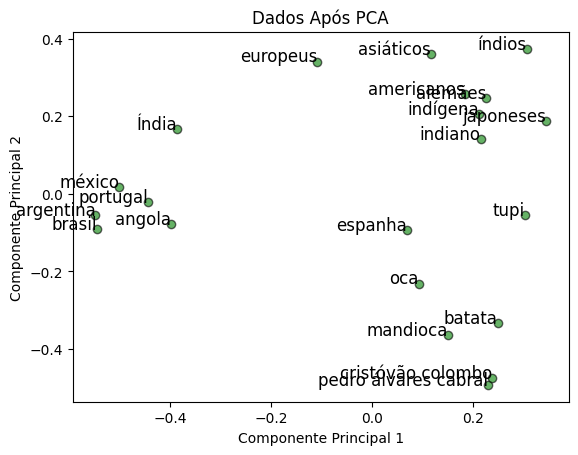

In [8]:

pca_visualizar(sentences, sentence_embeddings)


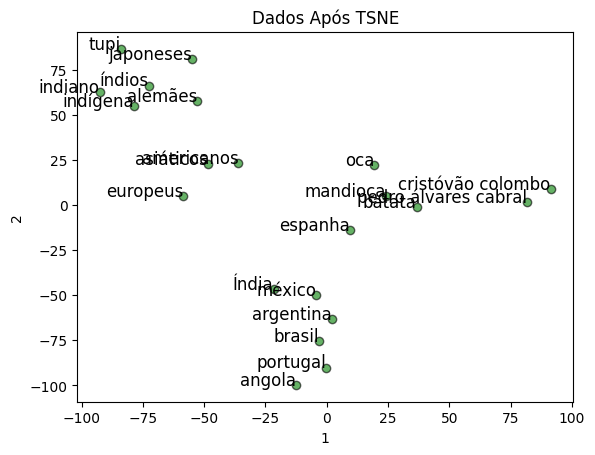

In [9]:
tsne_visualizer(sentences, sentence_embeddings)